In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Plot settings
# Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = sns.color_palette("rocket", 12)
suptitle_fontsize = 14
title_fontsize = 13
axis_fontsize = 10
label_fontsize = 10
legend_fontsize = 10

df = pd.read_csv("wine-full.csv")
df.head()
# Split dry from sweet wines
df["dry"] = df["residual sugar"] <= 4

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  dry                   6497 non-null   bool   
dtypes: bool(1), float64(11), int64(1), object(1)
memory usage: 666.3+ KB


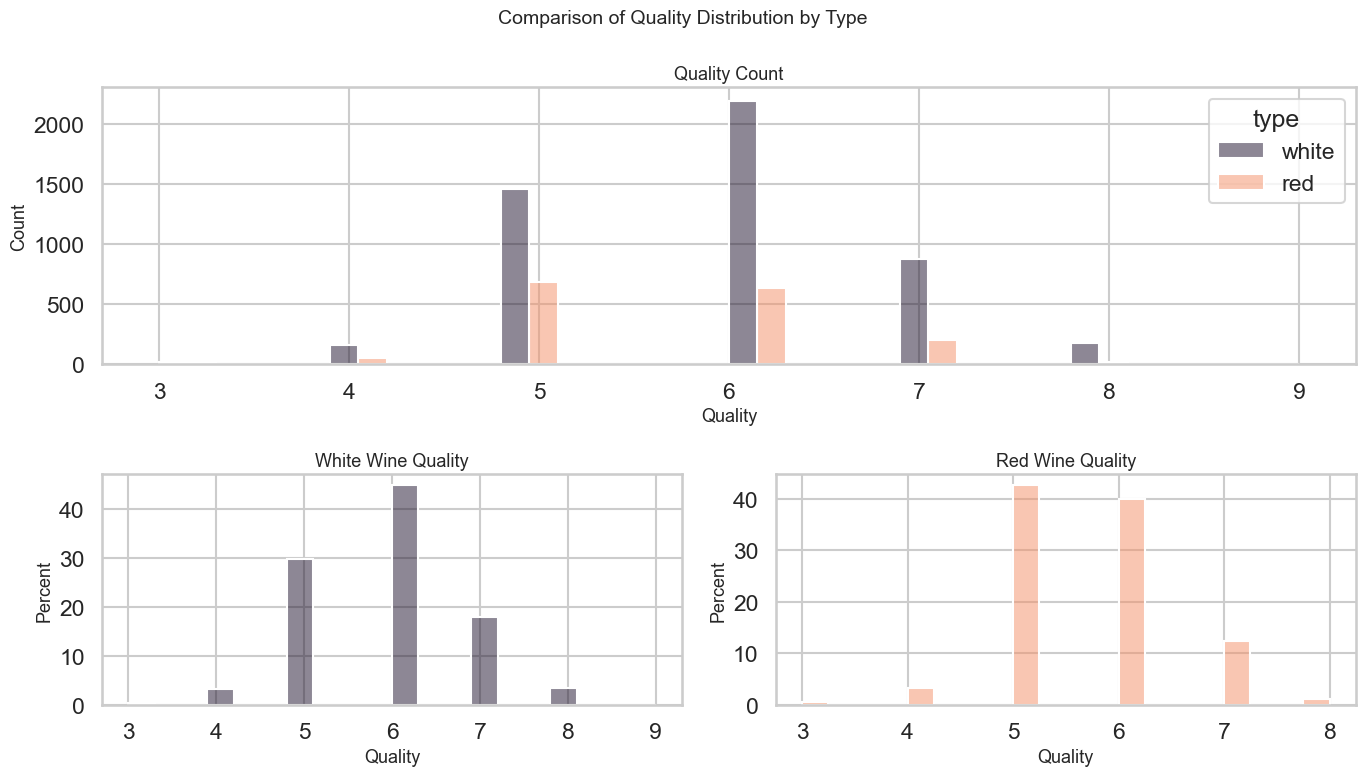

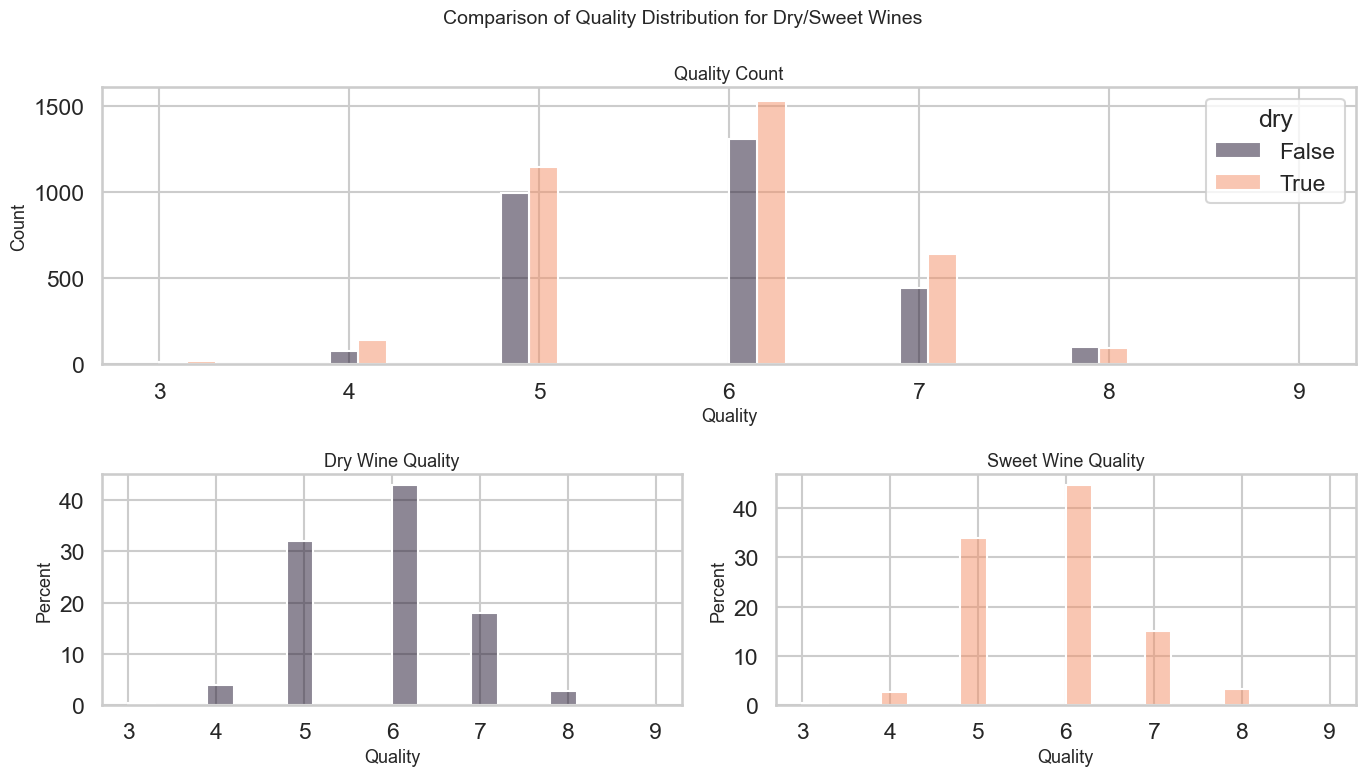

In [3]:
# Figure for white/red
fig = plt.figure(figsize=(14, 8))

gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 1])
ax_top = fig.add_subplot(gs[0, :])

ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Countplot in upper subplot
sns.histplot(
    data=df,
    x="quality",
    bins=20,
    hue="type",
    palette=[palette[0], palette[9]],
    multiple="dodge",
    alpha=0.5,
    ax=ax_top,
    stat="count",
)
ax_top.set_title("Quality Count", fontsize=title_fontsize)
ax_top.set_xlabel("Quality", fontsize=title_fontsize)
ax_top.set_ylabel("Count", fontsize=title_fontsize)

# Percentage plot for White wines only
sns.histplot(
    data=df[df["type"] == "white"],
    x="quality",
    bins=20,
    color=palette[0],
    alpha=0.5,
    ax=ax_bottom_left,
    stat="percent",
)
ax_bottom_left.set_title("White Wine Quality", fontsize=title_fontsize)
ax_bottom_left.set_xlabel("Quality", fontsize=title_fontsize)
ax_bottom_left.set_ylabel("Percent", fontsize=title_fontsize)

# Percentage plot for Red wines only
sns.histplot(
    data=df[df["type"] == "red"],
    x="quality",
    bins=20,
    color=palette[9],
    alpha=0.5,
    ax=ax_bottom_right,
    stat="percent",
)
ax_bottom_right.set_title("Red Wine Quality", fontsize=title_fontsize)
ax_bottom_right.set_xlabel("Quality", fontsize=title_fontsize)
ax_bottom_right.set_ylabel("Percent", fontsize=title_fontsize)

fig.suptitle("Comparison of Quality Distribution by Type", fontsize=suptitle_fontsize)
fig.tight_layout()
plt.show()

# Figure for dry/sweet
fig = plt.figure(figsize=(14, 8))

gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 1])
ax_top = fig.add_subplot(gs[0, :])

ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Countplot in upper subplot
sns.histplot(
    data=df,
    x="quality",
    bins=20,
    hue="dry",
    palette=[palette[0], palette[9]],
    multiple="dodge",
    alpha=0.5,
    ax=ax_top,
    stat="count",
)
ax_top.set_title("Quality Count", fontsize=title_fontsize)
ax_top.set_xlabel("Quality", fontsize=title_fontsize)
ax_top.set_ylabel("Count", fontsize=title_fontsize)

# Percentage plot for White wines only
sns.histplot(
    data=df[df["dry"]],
    x="quality",
    bins=20,
    color=palette[0],
    alpha=0.5,
    ax=ax_bottom_left,
    stat="percent",
)
ax_bottom_left.set_title("Dry Wine Quality", fontsize=title_fontsize)
ax_bottom_left.set_xlabel("Quality", fontsize=title_fontsize)
ax_bottom_left.set_ylabel("Percent", fontsize=title_fontsize)

# Percentage plot for Red wines only
sns.histplot(
    data=df[~df["dry"]],
    x="quality",
    bins=20,
    color=palette[9],
    alpha=0.5,
    ax=ax_bottom_right,
    stat="percent",
)
ax_bottom_right.set_title("Sweet Wine Quality", fontsize=title_fontsize)
ax_bottom_right.set_xlabel("Quality", fontsize=title_fontsize)
ax_bottom_right.set_ylabel("Percent", fontsize=title_fontsize)

fig.suptitle(
    "Comparison of Quality Distribution for Dry/Sweet Wines", fontsize=suptitle_fontsize
)
fig.tight_layout()
plt.show()


### Questions 1 & 2 & 3
The plots do not allow us to conclude that one type of wine is better than the other. In the top subplot, the white wines appear to have higher peaks in quality scores, but this is misleading because the dataset is imbalanced and contains more white wine samples overall. The bottom subplots, which show the percentage distribution within each wine type separately, reveal that both red and white wines follow very similar quality patterns. Based on the available data, we can say that we have similar distribution of quality scores per class but we cannot conclude that one type has higher quality compared to the other.

Regarding sweet and dry wines we split them into two categories based on attribute `residual sugar` with a threshold of `<=4`. From the subplots we see that dry and sweet wines have the same quality score percentages, so again we cannot conclude to something.

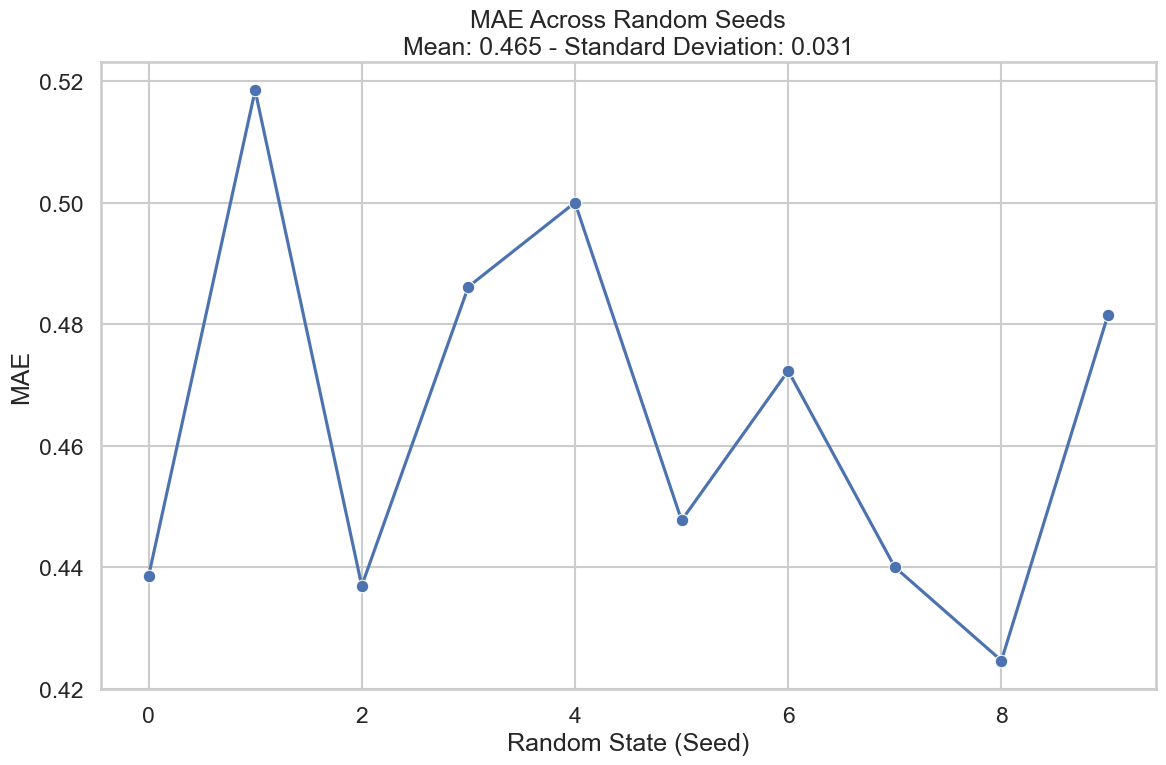

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

y_col = "quality"
x_cols = [x for x in df.drop(columns=["type", "dry"]).columns if x != y_col]
X = df[x_cols].to_numpy()
y = df[y_col].to_numpy()
mae = {}

for seed in range(10):
    # Split to train/test set
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=seed
    )

    model = DecisionTreeRegressor(random_state=seed)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mae[seed] = mean_absolute_error(y_test, y_pred)

mae_df = pd.DataFrame({"seed": list(mae.keys()), "mae": list(mae.values())})

mae_mean = mae_df["mae"].mean()
mae_std = mae_df["mae"].std()

plt.figure(figsize=(12, 8))
sns.lineplot(data=mae_df, x="seed", y="mae", marker="o")
plt.title(
    f"MAE Across Random Seeds\nMean: {mae_mean:.3f} - Standard Deviation: {mae_std:.3f}"
)
plt.xlabel("Random State (Seed)")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()

In [5]:
import scipy.stats as st

n = len(mae_df)

ci_low, ci_high = st.t.interval(0.95, df=n - 1, loc=mae_mean, scale=mae_std / (n**0.5))

print(f"Confidence interval: {ci_low:.3f}-{ci_high:.3f}")


Confidence interval: 0.442-0.487


### Question 6
We could use mean and standard deviation of MAE to calculate a range of our predictions. Something that is typically used is `(mean +-2*std)`.

Moreover, these metrics can be used in the calculation of a confidence interval based on specific formulas like the one in the cell above from library `scipy.stats`. The confidence interval means that with `95%` confidence, the true MAE lies between `0.442` and `0.487`.

In [6]:
# Split to train/test set
train_size = 0.7
val_size = 0.2
test_size = 0.1

x_tmp, x_test, y_tmp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed
)

x_train, x_val, y_train, y_val = train_test_split(
    X, y, test_size=(val_size / train_size + val_size), random_state=seed
)


# Define hyperparameter grid
max_depths = [2, 4, 6, 8, 10]
min_samples_leafs = [2, 4, 8]

best_mae_train = None
best_params_train = {}

best_mae_val = None
best_params_val = {}

for depth in max_depths:
    for leaf in min_samples_leafs:
        model = DecisionTreeRegressor(
            max_depth=depth, min_samples_leaf=leaf, random_state=0
        )
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_val = mean_absolute_error(y_val, y_val_pred)

        if not best_mae_val:
            best_mae_val = mae_val
            best_params_val = {"max_depth": depth, "min_samples_leaf": leaf}
        elif mae_val < best_mae_val:
            best_mae_val = mae_val
            best_params_val = {"max_depth": depth, "min_samples_leaf": leaf}

        if not best_mae_train:
            best_mae_train = mae_train
            best_params_train = {"max_depth": depth, "min_samples_leaf": leaf}
        elif mae_train < best_mae_train:
            best_mae_train = mae_train
            best_params_train = {"max_depth": depth, "min_samples_leaf": leaf}

print("Best MAE on train:", best_mae_train)
print("Best hyperparameters on train MAE:", best_params_train)

print("Best MAE on validation:", best_mae_val)
print("Best hyperparameters on validation MAE:", best_params_val)

Best MAE on train: 0.34141141895356847
Best hyperparameters on train MAE: {'max_depth': 10, 'min_samples_leaf': 2}
Best MAE on validation: 0.5717876708130519
Best hyperparameters on validation MAE: {'max_depth': 6, 'min_samples_leaf': 2}


### Question 8
Hyperparameters should be tuned using the validation set because the model hasn’t seen this data during training, so the metrics reflect how well it generalizes. Using the training set for tuning is not correct, as the model has already seen this data and it can lead to overfitting.

In [7]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

y_col = "quality"
x_cols = [x for x in df.drop(columns=["type", "dry"]).columns if x != y_col]
X = df[x_cols].to_numpy()
y = df[y_col].to_numpy()

# Define the parameter grid to search
param_grid = {
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
}

# Create a DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

# Define scoring metric: negative MAE because GridSearchCV maximizes the score
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt, param_grid=param_grid, scoring=mae_scorer, cv=10, n_jobs=-1, verbose=1
)

# Fit grid search
grid_search.fit(X, y)

# Best hyperparameters and corresponding MAE
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_  # negate because we used negative MAE

print("Best hyperparameters:", best_params)
print("Best CV MAE:", best_mae)


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.5821010600817406


### Question 10
The best MAE achieved on the training set is `0.581`. The most reliable approach for hyperparameter tuning is the one shown above using `GridSearchCV`. This method allows us to test multiple combinations of parameters and performs k-fold cross-validation. Cross validation reduces the risk of overfitting since everytime it validates the model on a different fold of data.

In [8]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

y_col = "quality"
x_cols = [x for x in df.drop(columns=["type", "dry"]).columns if x != y_col]
X = df[x_cols].to_numpy()
y = df[y_col].to_numpy()

# Define the parameter grid to search
param_grid = {
    "max_depth": [5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
}

# Create a DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

# Define scoring metric: negative MAE because GridSearchCV maximizes the score
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt, param_grid=param_grid, scoring=mae_scorer, cv=10, n_jobs=-1, verbose=1
)

# Fit grid search
grid_search.fit(X, y)

# Best hyperparameters and corresponding MAE
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_  # negate because we used negative MAE

print("Best hyperparameters:", best_params)
print("Best CV MAE:", best_mae)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV MAE: 0.5789332238727869


|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- residual sugar <= 10.15
|   |   |   |   |--- free sulfur dioxide <= 10.50
|   |   |   |   |   |--- value: [5.25]
|   |   |   |   |--- free sulfur dioxide >  10.50
|   |   |   |   |   |--- value: [5.89]
|   |   |   |--- residual sugar >  10.15
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [6.81]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.11]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |--- sulphates <= 0.81
|   |   |   |   |   |--- value: [5.36]
|   |   |   |   |--- sulphates >  0.81
|   |   |   |   |   |--- value: [6.33]
|   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |--- sulphates <= 0.45
|   |   |   |   |   |--- value: [5.62]
|   |   |   |   |--- sulphates >  0.45
|   |   |   |   |   |--- value: [5.90]
|   |--- volatile acidity >  0.24
|   |   |-

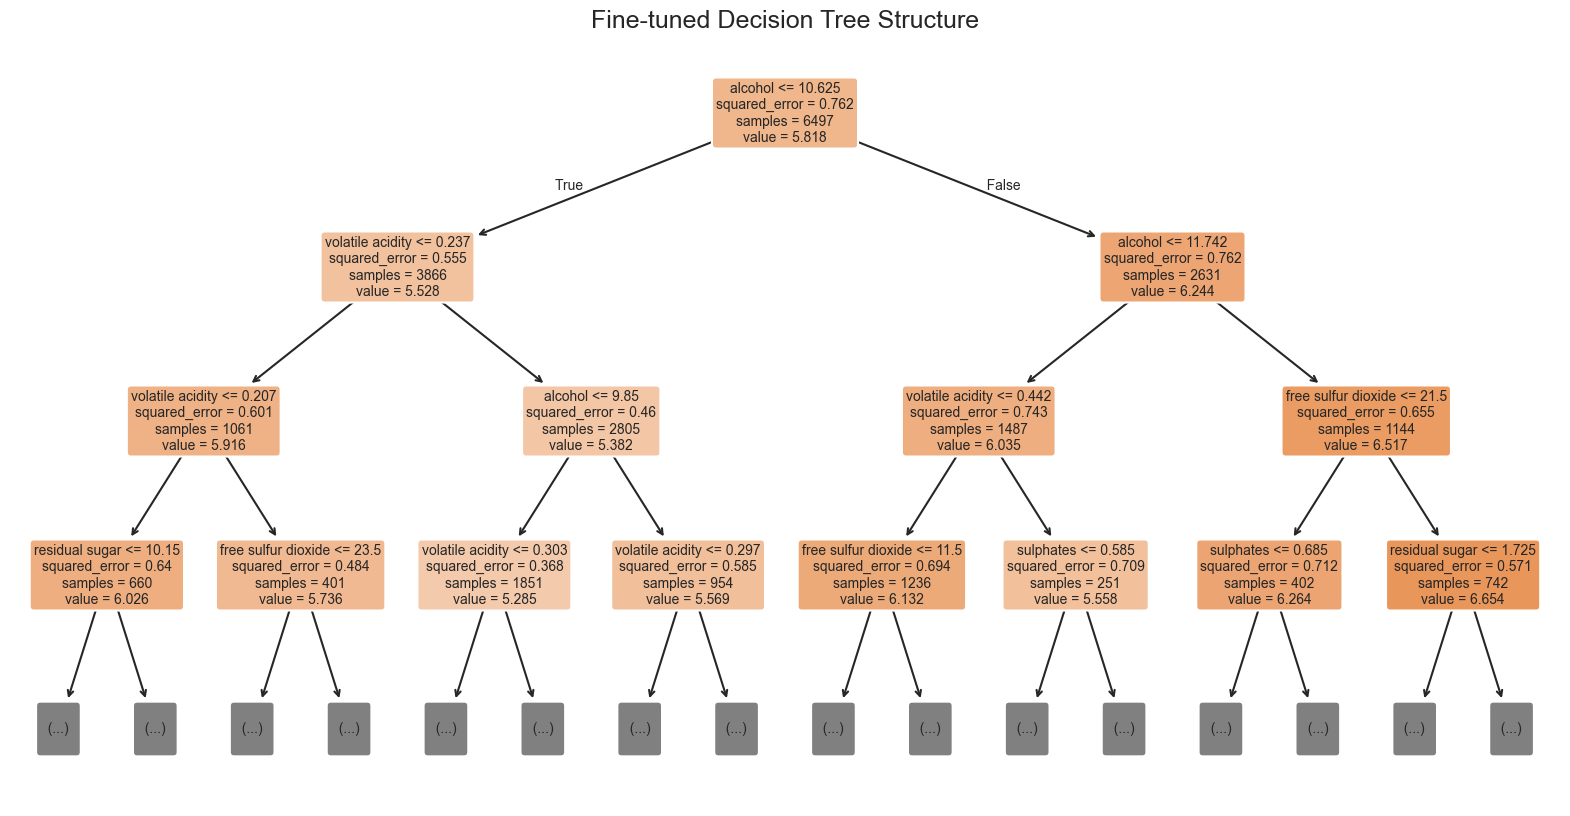

C:\Users\zikopis\AppData\Local\Temp\ipykernel_7768\1690698777.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance, x="importance", y="feature", palette="viridis")


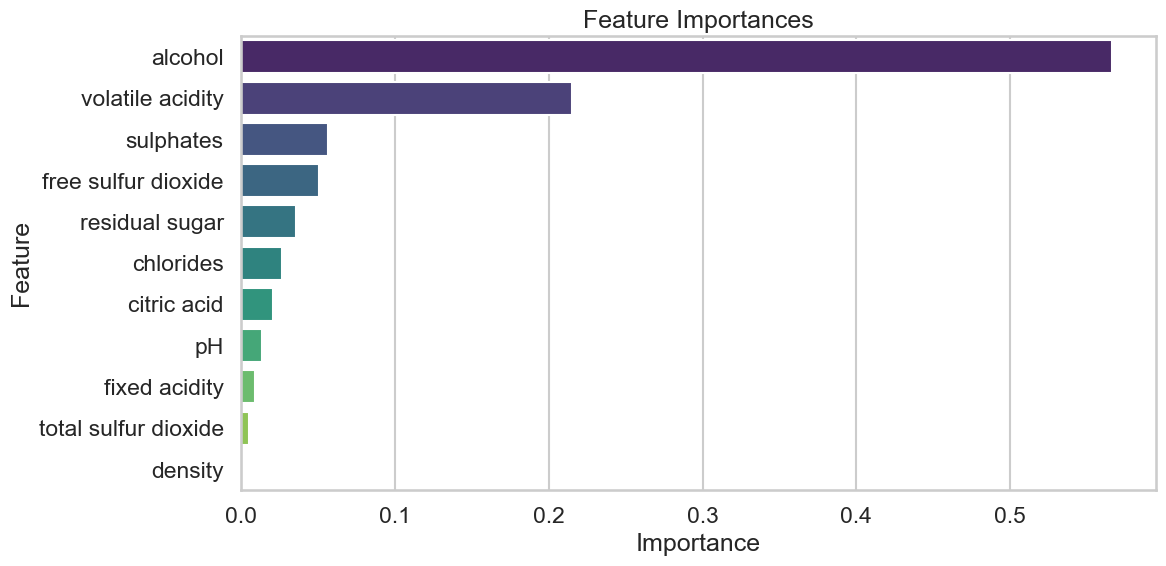

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import export_text, plot_tree

best_tree = DecisionTreeRegressor(**best_params, random_state=0)
best_tree.fit(X, y)
rules = export_text(best_tree, feature_names=x_cols)
print(rules)

plt.figure(figsize=(20, 10))
plot_tree(
    best_tree, feature_names=x_cols, filled=True, rounded=True, fontsize=10, max_depth=3
)
plt.title("Fine-tuned Decision Tree Structure")
plt.show()

feat_importance = pd.DataFrame(
    {"feature": x_cols, "importance": best_tree.feature_importances_}
).sort_values(by="importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_importance, x="importance", y="feature", palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()